In [1]:
import sys
# adding search_optimization_tools to the system path
sys.path.insert(0, '../')

In [2]:
import latexify
import random
import math
import numpy as np
# import sympy
from search_optimization_tools.algorithms.trajectory_based import SimulatedAnnealing
from search_optimization_tools.problems import ProblemBase, ContinuousFunctionBase

In [3]:
class simple_parabolic_curve(ProblemBase):
    def __init__(self) -> None:
        super().__init__()
        self.__bounds = [0, 31]
        self.__range = self.__bounds[1] - self.__bounds[0]         

    def get_init_solution(self):
        return self.__bounds[0] + random.random() * self.__range
    
    def get_neighbour_solution(self, sol):
        new_sol = self.__bounds[0] - 1
        while new_sol<self.__bounds[0] or new_sol>self.__bounds[1]:
            new_sol = random.gauss(sol, 1)
        return new_sol

    def eval_solution(self, sol):
        return (sol-6)**2

simple_parabolic_curve_obj = simple_parabolic_curve()

In [4]:
sa = SimulatedAnnealing(max_iter=1000, max_iter_per_temp=100, initial_temp=1000, final_temp=0.0001, cooling_schedule='geometric', cooling_alpha=0.9)

In [5]:
sa.run(simple_parabolic_curve_obj)
sa.s_best, sa.val_best,sa.t,sa.iter

(5.999996830446134, 1.0046071706873923e-11, 9.97938882337113e-05, 154)

In [6]:
@latexify.with_latex
def bukin(x_1, x_2):
    return 100*math.sqrt(abs(x_2-0.01*x_1**2)) + 0.01 * abs(x_1 + 10)

bukin_bounds = np.asarray([[-15, -5], [-3, 3]])
bukin_obj = ContinuousFunctionBase(bukin, bukin_bounds, 5)
bukin

<latexify.core.with_latex.<locals>._LatexifiedFunction at 0x297e9803f70>

In [7]:
sa.run(bukin_obj)
sa.s_best, sa.val_best,sa.t,sa.iter

(array([-11.45651577,   1.31249804]),
 0.4561374514626729,
 9.97938882337113e-05,
 154)

global minimum: x = -11.4565, 1.3125, f(x) = 0.4561


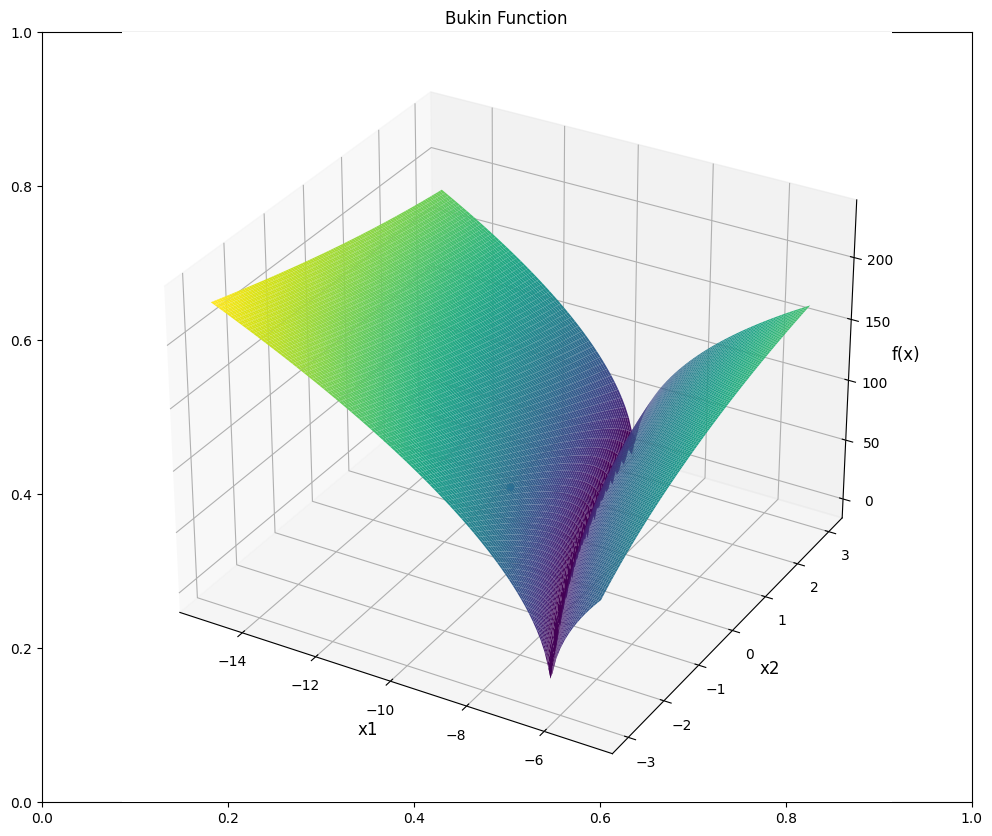

In [8]:
bukin_obj.plot(sa.s_best,'Bukin Function')

In [9]:
pi = math.pi
@latexify.with_latex
def gramacy_and_lee(x):
    return math.sin(10*pi*x)/(2*x) + (x-1)**4

gramacy_and_lee_bounds = np.asarray([[0.5, 2.5]])
gramacy_and_lee_obj = ContinuousFunctionBase(gramacy_and_lee, gramacy_and_lee_bounds, .1)
gramacy_and_lee

<latexify.core.with_latex.<locals>._LatexifiedFunction at 0x297ec671c60>

In [10]:
sa.run(gramacy_and_lee_obj)
sa.s_best, sa.val_best,sa.t,sa.iter

(array([0.54855966]), -0.8690111285493286, 9.97938882337113e-05, 154)

global minimum: x = 0.5486, f(x) = -0.8690


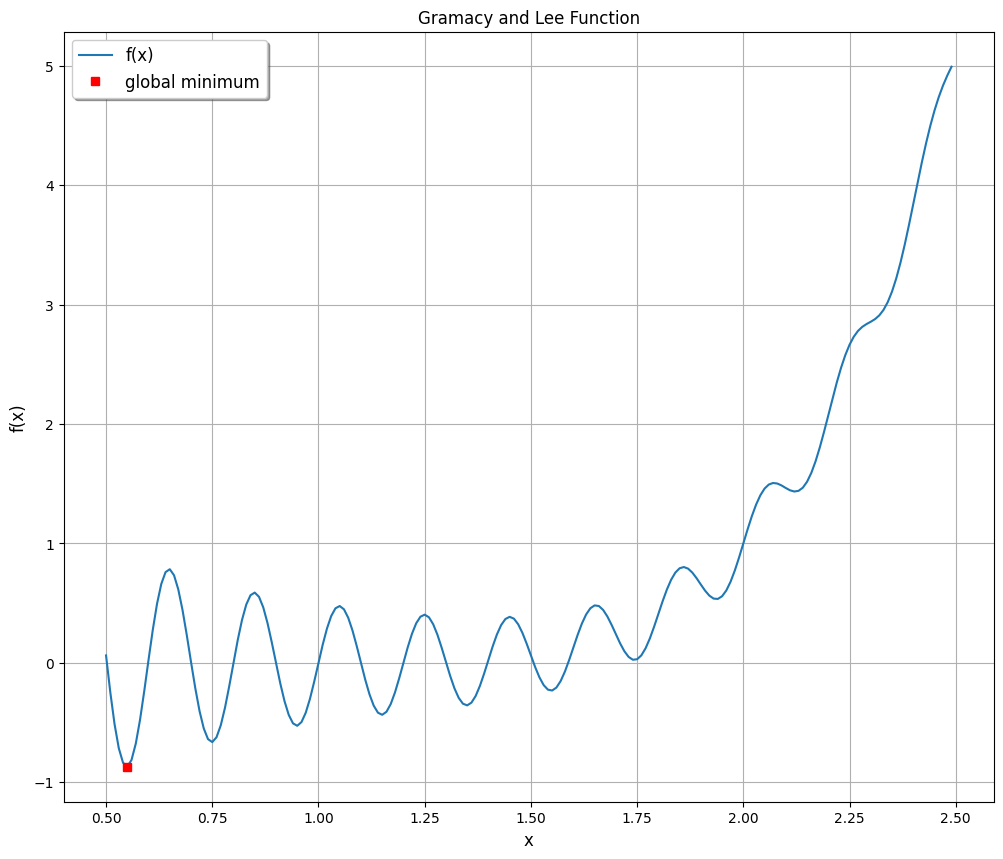

In [11]:
gramacy_and_lee_obj.plot(sa.s_best,'Gramacy and Lee Function')

In [12]:
def griewank(*x):
    x = np.asarray(x)
    return np.sum(x**2/4000) - np.prod(np.cos(x/np.sqrt(np.asarray(range(1, len(x)+1))))) + 1

griewank_bounds = np.asarray([[-600, 600]])
griewank_1d=ContinuousFunctionBase(griewank, griewank_bounds, 10)

In [13]:
sa.run(griewank_1d)
sa.s_best, sa.val_best,sa.t,sa.iter

(array([-0.00021622]), 2.3387928482776488e-08, 9.97938882337113e-05, 154)

global minimum: x = -0.0002, f(x) = 0.0000


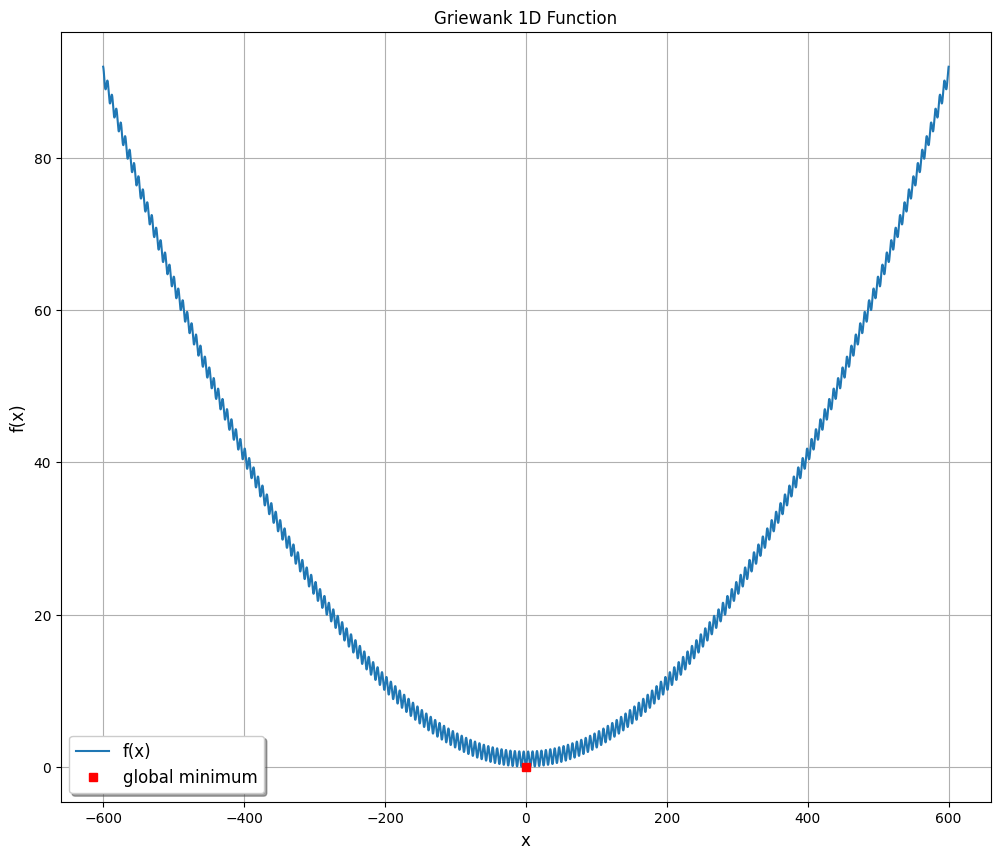

In [14]:
griewank_1d.plot(sa.s_best,'Griewank 1D Function')

In [15]:
griewank_bounds_2d = np.asarray([[-600, 600]]*2)
griewank_2d=ContinuousFunctionBase(griewank, griewank_bounds_2d, (griewank_bounds_2d[:, 1] - griewank_bounds_2d[:, 0])/10)

In [16]:
sa.run(griewank_2d)
sa.s_best, sa.val_best,sa.t,sa.iter

(array([ -9.36429319, -13.33410736]),
 0.06820818312983357,
 9.97938882337113e-05,
 154)

global minimum: x = -9.3643, -13.3341, f(x) = 0.0682


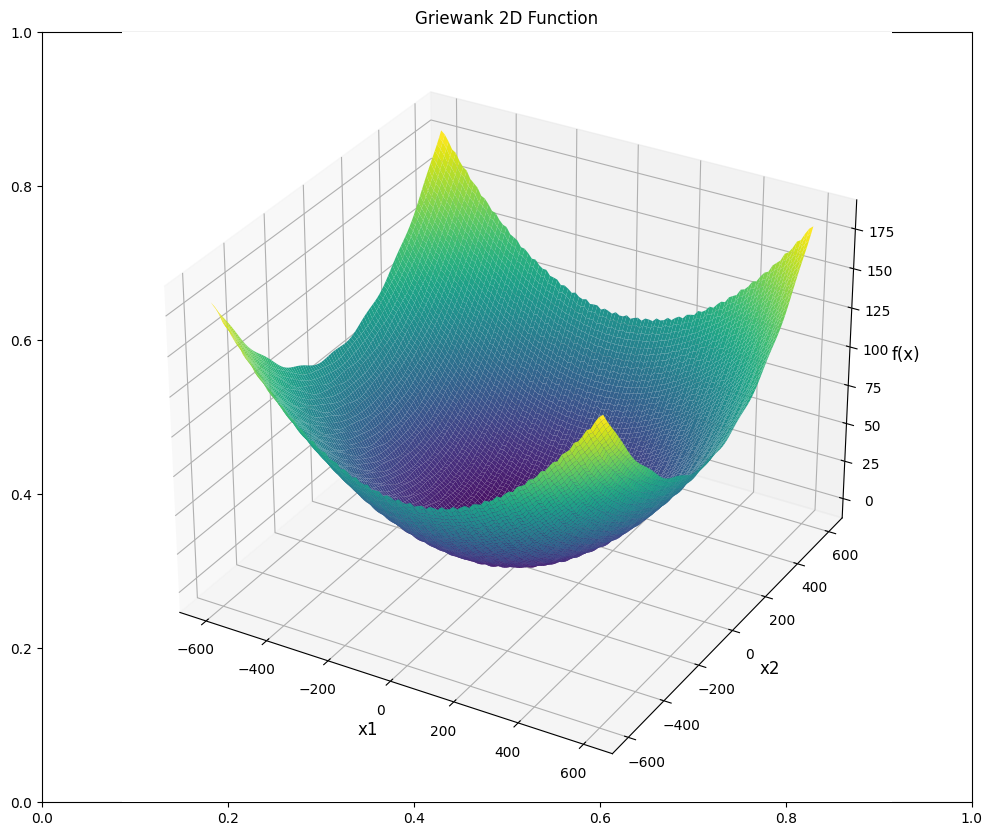

In [17]:
griewank_2d.plot(sa.s_best,'Griewank 2D Function')

In [18]:
griewank_bounds_3d = np.asarray([[-600, 600]]*3)
griewank_3d=ContinuousFunctionBase(griewank, griewank_bounds_3d, (griewank_bounds_3d[:, 1] - griewank_bounds_3d[:, 0])/10)

In [19]:
sa.run(griewank_3d)
sa.s_best, sa.val_best,sa.t,sa.iter

(array([-6.03499309,  5.23090134, 16.05699092]),
 0.26744793445223225,
 9.97938882337113e-05,
 154)